In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import tensorflow as tf
%matplotlib inline

In [2]:
data = pd.read_csv("../input/eurousd-currency-data/EURUSD_augH1_BidAndAsk.csv")
data.head()

,Date,Time,OpenBid,HighBid,LowBid,CloseBid,OpenAsk,HighAsk,LowAsk,CloseAsk,Total Ticks
0,06/28/2021,05:00:00,1.19220,1.19283,1.19213,1.19253,1.19233,1.19294,1.19225,1.19266,3254
1,06/28/2021,06:00:00,1.19253,1.19330,1.19226,1.19302,1.19266,1.19343,1.19238,1.19314,7996
2,06/28/2021,07:00:00,1.19302,1.19440,1.19270,1.19412,1.19314,1.19453,1.19282,1.19423,12773
3,06/28/2021,08:00:00,1.19412,1.19424,1.19250,1.19408,1.19423,1.19436,1.19262,1.19422,11368
4,06/28/2021,09:00:00,1.19408,1.19434,1.19330,1.19366,1.19422,1.19446,1.19339,1.19378,8344


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1091 entries, 0 to 1090
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         1091 non-null   object 
 1   Time         1091 non-null   object 
 2   OpenBid      1091 non-null   float64
 3   HighBid      1091 non-null   float64
 4   LowBid       1091 non-null   float64
 5   CloseBid     1091 non-null   float64
 6   OpenAsk      1091 non-null   float64
 7   HighAsk      1091 non-null   float64
 8   LowAsk       1091 non-null   float64
 9   CloseAsk     1091 non-null   float64
 10  Total Ticks  1091 non-null   int64  
dtypes: float64(8), int64(1), object(2)
memory usage: 93.9+ KB


In [4]:
data.describe()

,OpenBid,HighBid,LowBid,CloseBid,OpenAsk,HighAsk,LowAsk,CloseAsk,Total Ticks
count,1091.000000,1091.000000,1091.000000,1091.000000,1091.00000,1091.000000,1091.000000,1091.000000,1091.000000
mean,1.180205,1.180709,1.179680,1.180194,1.18036,1.180856,1.179828,1.180349,6710.762603
std,0.005926,0.005932,0.005892,0.005915,0.00593,0.005934,0.005896,0.005919,5923.390151
min,1.166770,1.167460,1.166340,1.166770,1.16689,1.167590,1.166450,1.166890,1.000000
25%,1.175855,1.176325,1.175360,1.175855,1.17602,1.176465,1.175510,1.176020,2789.000000
50%,1.180030,1.180550,1.179520,1.180010,1.18023,1.180660,1.179710,1.180220,5183.000000
75%,1.185020,1.185680,1.184510,1.184980,1.18517,1.185810,1.184635,1.185145,9009.500000
max,1.194120,1.194400,1.193370,1.194120,1.19423,1.194530,1.193490,1.194230,66897.000000


In [5]:
data["log_returns"] = np.log(1+data["CloseBid"].pct_change())
data.tail(100)

,Date,Time,OpenBid,HighBid,LowBid,CloseBid,OpenAsk,HighAsk,LowAsk,CloseAsk,Total Ticks,log_returns
991,08/24/2021,04:00:00,1.17373,1.17407,1.17366,1.17406,1.17384,1.17420,1.17379,1.17420,1082,0.000281
992,08/24/2021,05:00:00,1.17406,1.17454,1.17401,1.17404,1.17420,1.17466,1.17410,1.17418,3667,-0.000017
993,08/24/2021,06:00:00,1.17404,1.17463,1.17382,1.17390,1.17418,1.17475,1.17394,1.17402,6501,-0.000119
994,08/24/2021,07:00:00,1.17390,1.17445,1.17324,1.17377,1.17402,1.17457,1.17337,1.17389,7928,-0.000111
995,08/24/2021,08:00:00,1.17377,1.17410,1.17266,1.17280,1.17389,1.17423,1.17279,1.17291,8183,-0.000827
...,...,...,...,...,...,...,...,...,...,...,...,...
1086,08/30/2021,01:00:00,1.18042,1.18075,1.18021,1.18058,1.18054,1.18088,1.18032,1.18069,4324,0.000136
1087,08/30/2021,02:00:00,1.18058,1.18094,1.18042,1.18050,1.18069,1.18106,1.18054,1.18062,4375,-0.000068
1088,08/30/2021,03:00:00,1.18050,1.18077,1.18019,1.18035,1.18062,1.18088,1.18032,1.18048,2453,-0.000127
1089,08/30/2021,04:00:00,1.18035,1.18067,1.18021,1.18031,1.18048,1.18079,1.18033,1.18043,1656,-0.000034


<AxesSubplot:>

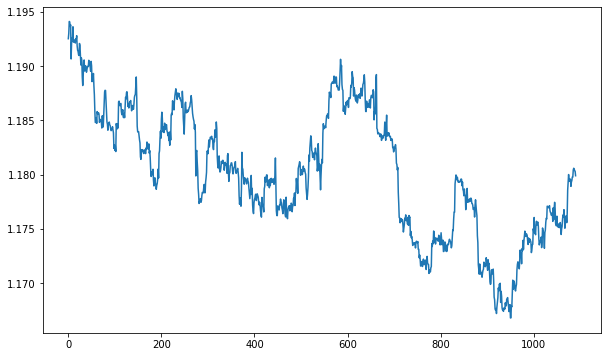

In [6]:
data["CloseBid"].plot(figsize=(10,6))

<AxesSubplot:>

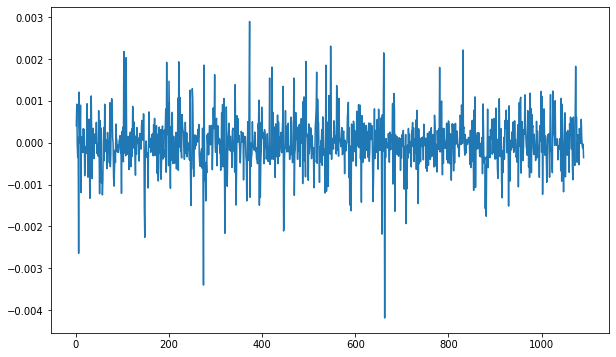

In [7]:
data["log_returns"].plot(figsize=(10,6))

In [8]:
meanlr = data["log_returns"].mean()
meanlr

-9.776043030571396e-06

In [9]:
data.describe()

,OpenBid,HighBid,LowBid,CloseBid,OpenAsk,HighAsk,LowAsk,CloseAsk,Total Ticks,log_returns
count,1091.000000,1091.000000,1091.000000,1091.000000,1091.00000,1091.000000,1091.000000,1091.000000,1091.000000,1090.000000
mean,1.180205,1.180709,1.179680,1.180194,1.18036,1.180856,1.179828,1.180349,6710.762603,-0.000010
std,0.005926,0.005932,0.005892,0.005915,0.00593,0.005934,0.005896,0.005919,5923.390151,0.000609
min,1.166770,1.167460,1.166340,1.166770,1.16689,1.167590,1.166450,1.166890,1.000000,-0.004188
25%,1.175855,1.176325,1.175360,1.175855,1.17602,1.176465,1.175510,1.176020,2789.000000,-0.000311
50%,1.180030,1.180550,1.179520,1.180010,1.18023,1.180660,1.179710,1.180220,5183.000000,-0.000008
75%,1.185020,1.185680,1.184510,1.184980,1.18517,1.185810,1.184635,1.185145,9009.500000,0.000289
max,1.194120,1.194400,1.193370,1.194120,1.19423,1.194530,1.193490,1.194230,66897.000000,0.002897


In [10]:
varlr = data["log_returns"].var()
varlr

3.7139302374728243e-07

In [11]:
drift = meanlr - (0.5*varlr)
drift

-9.961739542445037e-06

In [12]:
stdlr = data["log_returns"].std()
stdlr

0.000609420235754674

In [13]:
time_interval = 30
iteration = 10

In [14]:
w = norm.ppf(.975)
w

1.959963984540054

In [15]:
dailyreturn95ci = np.exp(drift + (stdlr*w))
dailyreturn95ci

1.0011851817474424

# Different confidence interval for the z-score i.e. 'critical value'

In [16]:
ci = np.random.rand(10, iteration)
ci

array([[0.36347899, 0.11415964, 0.15249899, 0.28401711, 0.41134623,
        0.23300174, 0.83943713, 0.91240928, 0.80290957, 0.6063831 ],
       [0.98703949, 0.66085016, 0.98333657, 0.61917713, 0.70420594,
        0.81650441, 0.40335522, 0.45545373, 0.36799269, 0.24940647],
       [0.51394165, 0.094052  , 0.75336749, 0.39198542, 0.56526879,
        0.05334754, 0.46493535, 0.10579663, 0.1066745 , 0.95969329],
       [0.85992991, 0.45387297, 0.83459652, 0.45838177, 0.77272827,
        0.4410512 , 0.71661006, 0.3980824 , 0.00181497, 0.00232801],
       [0.75323078, 0.57868274, 0.96167589, 0.10441404, 0.97022659,
        0.71288648, 0.48059836, 0.30936406, 0.06866365, 0.34248892],
       [0.66207546, 0.84682741, 0.12363925, 0.31477838, 0.23375405,
        0.99573336, 0.24980322, 0.46568123, 0.92507898, 0.5176825 ],
       [0.84964227, 0.34017971, 0.88948601, 0.77497482, 0.67515915,
        0.63699747, 0.73902356, 0.23957712, 0.5078382 , 0.1741232 ],
       [0.11097872, 0.70299425, 0.4006009

In [17]:
alpha = 2*(1-ci)

In [18]:
alpha

array([[1.27304201, 1.77168072, 1.69500202, 1.43196578, 1.17730754,
        1.53399651, 0.32112574, 0.17518145, 0.39418087, 0.7872338 ],
       [0.02592102, 0.67829969, 0.03332685, 0.76164573, 0.59158812,
        0.36699118, 1.19328957, 1.08909254, 1.26401462, 1.50118706],
       [0.9721167 , 1.81189601, 0.49326502, 1.21602916, 0.86946243,
        1.89330493, 1.0701293 , 1.78840674, 1.786651  , 0.08061342],
       [0.28014018, 1.09225406, 0.33080697, 1.08323645, 0.45454346,
        1.11789759, 0.56677987, 1.20383521, 1.99637007, 1.99534399],
       [0.49353843, 0.84263452, 0.07664821, 1.79117192, 0.05954681,
        0.57422704, 1.03880327, 1.38127189, 1.86267271, 1.31502216],
       [0.67584908, 0.30634519, 1.7527215 , 1.37044324, 1.5324919 ,
        0.00853329, 1.50039357, 1.06863754, 0.14984204, 0.96463501],
       [0.30071545, 1.31964059, 0.22102798, 0.45005037, 0.64968171,
        0.72600507, 0.52195288, 1.52084576, 0.98432359, 1.65175359],
       [1.77804256, 0.5940115 , 1.1987981

In [19]:
civalue = 1-alpha
civalue

array([[-0.27304201, -0.77168072, -0.69500202, -0.43196578, -0.17730754,
        -0.53399651,  0.67887426,  0.82481855,  0.60581913,  0.2127662 ],
       [ 0.97407898,  0.32170031,  0.96667315,  0.23835427,  0.40841188,
         0.63300882, -0.19328957, -0.08909254, -0.26401462, -0.50118706],
       [ 0.0278833 , -0.81189601,  0.50673498, -0.21602916,  0.13053757,
        -0.89330493, -0.0701293 , -0.78840674, -0.786651  ,  0.91938658],
       [ 0.71985982, -0.09225406,  0.66919303, -0.08323645,  0.54545654,
        -0.11789759,  0.43322013, -0.20383521, -0.99637007, -0.99534399],
       [ 0.50646157,  0.15736548,  0.92335179, -0.79117192,  0.94045319,
         0.42577296, -0.03880327, -0.38127189, -0.86267271, -0.31502216],
       [ 0.32415092,  0.69365481, -0.7527215 , -0.37044324, -0.5324919 ,
         0.99146671, -0.50039357, -0.06863754,  0.85015796,  0.03536499],
       [ 0.69928455, -0.31964059,  0.77897202,  0.54994963,  0.35031829,
         0.27399493,  0.47804712, -0.52084576

### Claculating different z score using ppf(precentage point function) method from Scikit learn lib, used to create a standardised normal distribution. This enables me to create z score based on some random confident interval  

In [20]:
z = norm.ppf(ci)
z

array([[-0.34917493, -1.20469963, -1.0257743 , -0.570949  , -0.22408334,
        -0.72899702,  0.99214717,  1.35574144,  0.85205986,  0.26990441],
       [ 2.22739306,  0.41478447,  2.12812341,  0.30332036,  0.53653605,
         0.90212365, -0.24467197, -0.11189399, -0.33717448, -0.67635869],
       [ 0.03495365, -1.31620874,  0.68512504, -0.27414807,  0.16434136,
        -1.61322759, -0.08800753, -1.24919637, -1.24440919,  1.74713789],
       [ 1.0800045 , -0.11588215,  0.97248973, -0.10451136,  0.74786189,
        -0.14830457,  0.57280036, -0.25831373, -2.9086498 , -2.82991659],
       [ 0.68469179,  0.19852475,  1.770474  , -1.25679443,  1.88413429,
         0.56183707, -0.04865188, -0.49765375, -1.48581791, -0.40567986],
       [ 0.4181341 ,  1.02292103, -1.15698498, -0.48235081, -0.7265395 ,
         2.63020713, -0.67510913, -0.08613077,  1.44008963,  0.04433797],
       [ 1.03490035, -0.41197273,  1.22379922,  0.75533106,  0.45420441,
         0.35044459,  0.64033801, -0.70766351

In [21]:
dailyreturns = np.exp(drift + (stdlr*z))
dailyreturns

array([[0.99977727, 0.99925615, 0.99936511, 0.99964215, 0.99985349,
        0.99954588, 1.00059485, 1.00081659, 1.00050943, 1.00015454],
       [1.00134836, 1.00024285, 1.00128779, 1.0001749 , 1.00031706,
        1.00053996, 0.99984094, 0.99992185, 0.99978458, 0.99957794],
       [1.00001134, 0.99918824, 1.00040765, 0.99982298, 1.0000902 ,
        0.9990074 , 0.99993641, 0.99922905, 0.99923197, 1.00105534],
       [1.00064842, 0.99991942, 1.00058286, 0.99992635, 1.0004459 ,
        0.99989966, 1.00033917, 0.99983263, 0.99821904, 0.99826693],
       [1.00040739, 1.00011103, 1.00106957, 0.99922442, 1.00113892,
        1.00033249, 0.99996039, 0.99968681, 0.99908497, 0.99974284],
       [1.00024489, 1.00061362, 0.9992852 , 0.99969613, 0.99954737,
        1.00159421, 0.9995787 , 0.99993755, 1.00086803, 1.00001706],
       [1.00062092, 0.99973901, 1.00073612, 1.00045045, 1.00026688,
        1.00020363, 1.00038035, 0.99955887, 1.00000201, 0.99941857],
       [0.99924601, 1.00031493, 0.9998366

In [22]:
p0 = data["CloseBid"][1090]
p0

1.17989

In [23]:
pricelist = np.zeros_like(dailyreturns)
pricelist

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [24]:
pricelist[0] = p0
pricelist

array([[1.17989, 1.17989, 1.17989, 1.17989, 1.17989, 1.17989, 1.17989,
        1.17989, 1.17989, 1.17989],
       [0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     ,
        0.     , 0.     , 0.     ],
       [0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     ,
        0.     , 0.     , 0.     ],
       [0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     ,
        0.     , 0.     , 0.     ],
       [0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     ,
        0.     , 0.     , 0.     ],
       [0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     ,
        0.     , 0.     , 0.     ],
       [0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     ,
        0.     , 0.     , 0.     ],
       [0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     ,
        0.     , 0.     , 0.     ],
       [0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     ,
        0.     , 0.     , 0.     ],
       [0.     , 0.     , 0.     , 0.

In [25]:
for p in range(1, 10):
    pricelist[p] = pricelist[p-1]*dailyreturns[p]
pricelist

array([[1.17989   , 1.17989   , 1.17989   , 1.17989   , 1.17989   ,
        1.17989   , 1.17989   , 1.17989   , 1.17989   , 1.17989   ],
       [1.18148092, 1.18017653, 1.18140945, 1.18009637, 1.1802641 ,
        1.18052709, 1.17970233, 1.17979779, 1.17963583, 1.17939202],
       [1.18149432, 1.17921852, 1.18189105, 1.17988747, 1.18037056,
        1.1793553 , 1.17962731, 1.17888823, 1.17872983, 1.18063667],
       [1.18226043, 1.17912349, 1.18257993, 1.17980057, 1.18089688,
        1.17923696, 1.18002741, 1.17869092, 1.17663055, 1.17859055],
       [1.18274207, 1.17925441, 1.18384479, 1.17888554, 1.18224182,
        1.17962905, 1.17998066, 1.17832176, 1.1755539 , 1.17828746],
       [1.18303171, 1.17997802, 1.18299858, 1.17852732, 1.18170671,
        1.18150962, 1.17948354, 1.17824817, 1.17657432, 1.17830757],
       [1.18376627, 1.17967006, 1.1838694 , 1.17905819, 1.18202208,
        1.18175021, 1.17993215, 1.17772842, 1.17657669, 1.17762247],
       [1.18287373, 1.18004157, 1.1836759

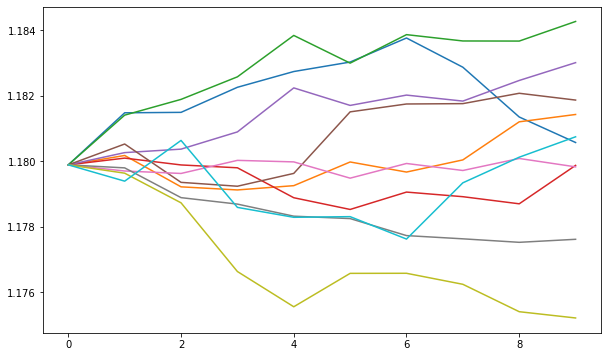

In [26]:
plt.figure(figsize=(10,6))
plt.plot(pricelist)

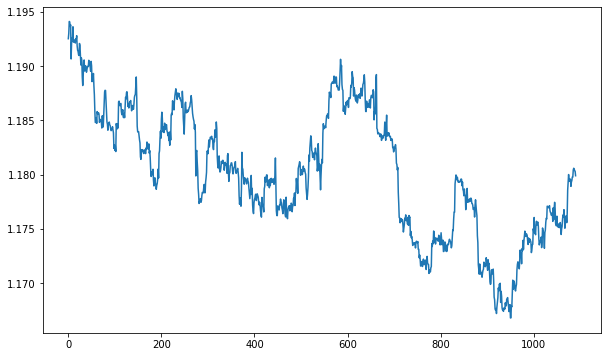

In [27]:
plt.figure(figsize=(10,6))
plt.plot(data["CloseBid"])

In [28]:
data.tail()

,Date,Time,OpenBid,HighBid,LowBid,CloseBid,OpenAsk,HighAsk,LowAsk,CloseAsk,Total Ticks,log_returns
1086,08/30/2021,01:00:00,1.18042,1.18075,1.18021,1.18058,1.18054,1.18088,1.18032,1.18069,4324,0.000136
1087,08/30/2021,02:00:00,1.18058,1.18094,1.18042,1.18050,1.18069,1.18106,1.18054,1.18062,4375,-0.000068
1088,08/30/2021,03:00:00,1.18050,1.18077,1.18019,1.18035,1.18062,1.18088,1.18032,1.18048,2453,-0.000127
1089,08/30/2021,04:00:00,1.18035,1.18067,1.18021,1.18031,1.18048,1.18079,1.18033,1.18043,1656,-0.000034
1090,08/30/2021,05:00:00,1.18031,1.18047,1.17987,1.17989,1.18043,1.18059,1.17999,1.18001,2317,-0.000356


In [29]:
pricelist[1:10]

array([[1.18148092, 1.18017653, 1.18140945, 1.18009637, 1.1802641 ,
        1.18052709, 1.17970233, 1.17979779, 1.17963583, 1.17939202],
       [1.18149432, 1.17921852, 1.18189105, 1.17988747, 1.18037056,
        1.1793553 , 1.17962731, 1.17888823, 1.17872983, 1.18063667],
       [1.18226043, 1.17912349, 1.18257993, 1.17980057, 1.18089688,
        1.17923696, 1.18002741, 1.17869092, 1.17663055, 1.17859055],
       [1.18274207, 1.17925441, 1.18384479, 1.17888554, 1.18224182,
        1.17962905, 1.17998066, 1.17832176, 1.1755539 , 1.17828746],
       [1.18303171, 1.17997802, 1.18299858, 1.17852732, 1.18170671,
        1.18150962, 1.17948354, 1.17824817, 1.17657432, 1.17830757],
       [1.18376627, 1.17967006, 1.1838694 , 1.17905819, 1.18202208,
        1.18175021, 1.17993215, 1.17772842, 1.17657669, 1.17762247],
       [1.18287373, 1.18004157, 1.18367596, 1.17891735, 1.18183862,
        1.18176112, 1.17971821, 1.17762975, 1.1762401 , 1.17934141],
       [1.18135273, 1.18120559, 1.1836728

In [30]:
pricelist

array([[1.17989   , 1.17989   , 1.17989   , 1.17989   , 1.17989   ,
        1.17989   , 1.17989   , 1.17989   , 1.17989   , 1.17989   ],
       [1.18148092, 1.18017653, 1.18140945, 1.18009637, 1.1802641 ,
        1.18052709, 1.17970233, 1.17979779, 1.17963583, 1.17939202],
       [1.18149432, 1.17921852, 1.18189105, 1.17988747, 1.18037056,
        1.1793553 , 1.17962731, 1.17888823, 1.17872983, 1.18063667],
       [1.18226043, 1.17912349, 1.18257993, 1.17980057, 1.18089688,
        1.17923696, 1.18002741, 1.17869092, 1.17663055, 1.17859055],
       [1.18274207, 1.17925441, 1.18384479, 1.17888554, 1.18224182,
        1.17962905, 1.17998066, 1.17832176, 1.1755539 , 1.17828746],
       [1.18303171, 1.17997802, 1.18299858, 1.17852732, 1.18170671,
        1.18150962, 1.17948354, 1.17824817, 1.17657432, 1.17830757],
       [1.18376627, 1.17967006, 1.1838694 , 1.17905819, 1.18202208,
        1.18175021, 1.17993215, 1.17772842, 1.17657669, 1.17762247],
       [1.18287373, 1.18004157, 1.1836759

In [31]:
dailyreturns

array([[0.99977727, 0.99925615, 0.99936511, 0.99964215, 0.99985349,
        0.99954588, 1.00059485, 1.00081659, 1.00050943, 1.00015454],
       [1.00134836, 1.00024285, 1.00128779, 1.0001749 , 1.00031706,
        1.00053996, 0.99984094, 0.99992185, 0.99978458, 0.99957794],
       [1.00001134, 0.99918824, 1.00040765, 0.99982298, 1.0000902 ,
        0.9990074 , 0.99993641, 0.99922905, 0.99923197, 1.00105534],
       [1.00064842, 0.99991942, 1.00058286, 0.99992635, 1.0004459 ,
        0.99989966, 1.00033917, 0.99983263, 0.99821904, 0.99826693],
       [1.00040739, 1.00011103, 1.00106957, 0.99922442, 1.00113892,
        1.00033249, 0.99996039, 0.99968681, 0.99908497, 0.99974284],
       [1.00024489, 1.00061362, 0.9992852 , 0.99969613, 0.99954737,
        1.00159421, 0.9995787 , 0.99993755, 1.00086803, 1.00001706],
       [1.00062092, 0.99973901, 1.00073612, 1.00045045, 1.00026688,
        1.00020363, 1.00038035, 0.99955887, 1.00000201, 0.99941857],
       [0.99924601, 1.00031493, 0.9998366

In [32]:
x1 = pricelist[0]*dailyreturns[1]
x1

array([1.18148092, 1.18017653, 1.18140945, 1.18009637, 1.1802641 ,
       1.18052709, 1.17970233, 1.17979779, 1.17963583, 1.17939202])

In [33]:
for x in range(1,10):
    pricelist[x] = pricelist[x-1]*dailyreturns[x]

In [34]:
pricelist

array([[1.17989   , 1.17989   , 1.17989   , 1.17989   , 1.17989   ,
        1.17989   , 1.17989   , 1.17989   , 1.17989   , 1.17989   ],
       [1.18148092, 1.18017653, 1.18140945, 1.18009637, 1.1802641 ,
        1.18052709, 1.17970233, 1.17979779, 1.17963583, 1.17939202],
       [1.18149432, 1.17921852, 1.18189105, 1.17988747, 1.18037056,
        1.1793553 , 1.17962731, 1.17888823, 1.17872983, 1.18063667],
       [1.18226043, 1.17912349, 1.18257993, 1.17980057, 1.18089688,
        1.17923696, 1.18002741, 1.17869092, 1.17663055, 1.17859055],
       [1.18274207, 1.17925441, 1.18384479, 1.17888554, 1.18224182,
        1.17962905, 1.17998066, 1.17832176, 1.1755539 , 1.17828746],
       [1.18303171, 1.17997802, 1.18299858, 1.17852732, 1.18170671,
        1.18150962, 1.17948354, 1.17824817, 1.17657432, 1.17830757],
       [1.18376627, 1.17967006, 1.1838694 , 1.17905819, 1.18202208,
        1.18175021, 1.17993215, 1.17772842, 1.17657669, 1.17762247],
       [1.18287373, 1.18004157, 1.1836759

In [35]:
augpr = pd.read_csv("../input/eurousd-currency-data/EURUSD_aug_BidAndAsk.csv")
augpr

,Date,Time,OpenBid,HighBid,LowBid,CloseBid,OpenAsk,HighAsk,LowAsk,CloseAsk,Total Ticks
0,08/02/2021,21:00:00,1.18660,1.18929,1.18530,1.18628,1.18723,1.18940,1.18542,1.18664,158204
1,08/03/2021,21:00:00,1.18628,1.18992,1.18321,1.18361,1.18664,1.19004,1.18334,1.18377,172577
2,08/04/2021,21:00:00,1.18361,1.18568,1.18277,1.18315,1.18377,1.18580,1.18288,1.18365,147869
3,08/05/2021,21:00:00,1.18315,1.18349,1.17537,1.17582,1.18365,1.18389,1.17549,1.17646,172508
